# Webscraping Homework - Solution Reference

#### Author: Yu-Chang Ho (Andy), UC Davis
#### Latest Update: 2019 10/22

This notebook demonstrates solution to the homework assignment of CMN189E at UC Davis.

- Target website:
    1. https://www.computrabajo.cl/empresas/buscador
    2. https://www.computrabajo.com.mx/empresas/buscador
    3. https://www.computrabajo.com.co/empresas/buscador
    4. https://www.computrabajo.com.ar/empresas/buscador
    5. https://www.computrabajo.com.pe/empresas/buscador
- Objective: Obtain the categories on the right panel with the number of item associated with it.

In [1]:
### import the required libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

## Part 1. Get the Value for only one website

In [3]:
url = 'https://www.computrabajo.cl/empresas/buscador'
# get the source code of the webpage
r = requests.get( url )
# check it out!
print( r.text )


<!DOCTYPE html>
<html  xmlns="http://www.w3.org/1999/xhtml" lang="es-CL">
<head><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=no" /><meta http-equiv="X-UA-Compatible" content="IE=edge" />
    <meta name="android_downloads" content="(3,200,000)" />
    
        <meta name="google-play-app" content="app-id=com.redarbor.computrabajo" />
    
        <meta name="apple-itunes-app" content="app-id=1093787284" />
    
    <meta name="meta_ctp" content="4" />
    <link rel="shortcut icon" type="image/x-icon" href="/c/img/favicon.ico" />    
    <link rel="next" href="?p=2"/>    
      
    <!-- Google Tag Manager -->
    
    <!-- End Google Tag Manager -->
    
    <meta name="description" content="Las mejores empresas - Computrabajo Chile . Busca y encuentra en la bolsa de empresas de Computrabajo Chile." />    
    <meta name="keywords"    content="empresas, empresas computrabajo Chil

In [4]:
### create a Beautiful Soup parser
soup = BeautifulSoup( r.text, 'html.parser' )

In [6]:
### find the box
boxes = soup.find_all( 'div', class_='box_filtrar_ch' )
print( len( boxes ) )

4


In [7]:
### target only the "Industrias" filter (Method 1)
target = None
for box in boxes:
    # find the identifier:
    #
    #   '<span class="icon industria"></span>'
    #
    if( box.find( 'span', class_="icon industria" ) is not None ):
        target = box
        break
print( target )

<div class="box_filtrar_ch">
<div class="box_filtrar_t">
<span class="icon industria"></span><h3>Industrias</h3>
</div>
<ul>
<li><span><a href="/empresas/empresas-de-servicios-profesionales">Servicios Profesionales</a> (9.474)</span></li><li><span><a href="/empresas/empresas-de-construccion-y-obras">Construcción / obras</a> (8.134)</span></li><li><span><a href="/empresas/empresas-de-venta-al-consumidor">Venta al consumidor</a> (6.982)</span></li><li><span><a href="/empresas/empresas-de-hosteleria-y-turismo">Hostelería / Turismo</a> (5.670)</span></li><li><span><a href="/empresas/empresas-de-educacion">Educación</a> (5.209)</span></li><li><span><a href="/empresas/empresas-de-rrhh-y-personal">RRHH / Personal</a> (4.555)</span></li><li><span><a href="/empresas/empresas-de-fabricacion">Fabricación</a> (4.474)</span></li><li><span><a href="/empresas/empresas-de-informatica-y-software">Informática / Software</a> (4.044)</span></li><li><span><a href="/empresas/empresas-de-transporte">Transpor

In [11]:
### target only the "Industrias" filter (Method 2)
identifier = soup.find( 'span', class_="icon industria" )
target = identifier.parent.parent
print( target )

<div class="box_filtrar_ch">
<div class="box_filtrar_t">
<span class="icon industria"></span><h3>Industrias</h3>
</div>
<ul>
<li><span><a href="/empresas/empresas-de-servicios-profesionales">Servicios Profesionales</a> (9.474)</span></li><li><span><a href="/empresas/empresas-de-construccion-y-obras">Construcción / obras</a> (8.134)</span></li><li><span><a href="/empresas/empresas-de-venta-al-consumidor">Venta al consumidor</a> (6.982)</span></li><li><span><a href="/empresas/empresas-de-hosteleria-y-turismo">Hostelería / Turismo</a> (5.670)</span></li><li><span><a href="/empresas/empresas-de-educacion">Educación</a> (5.209)</span></li><li><span><a href="/empresas/empresas-de-rrhh-y-personal">RRHH / Personal</a> (4.555)</span></li><li><span><a href="/empresas/empresas-de-fabricacion">Fabricación</a> (4.474)</span></li><li><span><a href="/empresas/empresas-de-informatica-y-software">Informática / Software</a> (4.044)</span></li><li><span><a href="/empresas/empresas-de-transporte">Transpor

In [12]:
### get the list of categories
lst = target.find( 'ul' )
print( lst )

<ul>
<li><span><a href="/empresas/empresas-de-servicios-profesionales">Servicios Profesionales</a> (9.474)</span></li><li><span><a href="/empresas/empresas-de-construccion-y-obras">Construcción / obras</a> (8.134)</span></li><li><span><a href="/empresas/empresas-de-venta-al-consumidor">Venta al consumidor</a> (6.982)</span></li><li><span><a href="/empresas/empresas-de-hosteleria-y-turismo">Hostelería / Turismo</a> (5.670)</span></li><li><span><a href="/empresas/empresas-de-educacion">Educación</a> (5.209)</span></li><li><span><a href="/empresas/empresas-de-rrhh-y-personal">RRHH / Personal</a> (4.555)</span></li><li><span><a href="/empresas/empresas-de-fabricacion">Fabricación</a> (4.474)</span></li><li><span><a href="/empresas/empresas-de-informatica-y-software">Informática / Software</a> (4.044)</span></li><li><span><a href="/empresas/empresas-de-transporte">Transporte / Logística</a> (4.041)</span></li><li><span><a href="/empresas/empresas-de-salud-y-medicina">Salud / Medicina</a> (3

In [15]:
### access the list elements
c = 0

for li in lst.find_all( 'li' ):
    print( li )

    ''' the following statements are just to prevent too much output '''
    c += 1
    if( c >= 5 ): break

<li><span><a href="/empresas/empresas-de-servicios-profesionales">Servicios Profesionales</a> (9.474)</span></li>
<li><span><a href="/empresas/empresas-de-construccion-y-obras">Construcción / obras</a> (8.134)</span></li>
<li><span><a href="/empresas/empresas-de-venta-al-consumidor">Venta al consumidor</a> (6.982)</span></li>
<li><span><a href="/empresas/empresas-de-hosteleria-y-turismo">Hostelería / Turismo</a> (5.670)</span></li>
<li><span><a href="/empresas/empresas-de-educacion">Educación</a> (5.209)</span></li>


In [16]:
### get the value
c = 0

for li in lst.find_all( 'li' ):
    print( li.find( 'span' ).text )
    
    ''' the following statements are just to prevent too much output '''
    c += 1
    if( c >= 5 ): break

Servicios Profesionales (9.474)
Construcción / obras (8.134)
Venta al consumidor (6.982)
Hostelería / Turismo (5.670)
Educación (5.209)


In [21]:
### how do you get the value?

''' approach 1: slice the string by " (" '''
li = lst.find( 'li' )
val = li.find( 'span' ).text

# seperate the string
parts = val.split( ' (' )
print( parts )

['Servicios Profesionales', '9.474)']
Servicios Profesionales 9.474)


In [24]:
# do further work for the number
# in many LAC country, '.' is the seperator

num = parts[ 1 ]
# since we know the number will not contains floating point
num = num.replace( '.', '' )
# get rid of the ')'
num = num.replace( ')', '' )
num = int(num)
print( num )

9474


In [33]:
''' approach 2 (advanced): do you know about regular expression (regex)? '''
# python regular expression (regex) library
import re

# '.':   representing any char
# '\':   escape char (cancel the original meaning)
# '\d':  numeric digit, or '0-9'
# '[]':  hold a pattern
# '*':   occurence 0 ~ inf
# '+':   occurence 1 ~ inf
# '{,}': occurence with self-specified range

matches = re.findall( '\d[\.\d]*', str(val) )
print( matches )

num = str(matches[ 0 ]).replace( '.', '' ).replace( ')', '' )
num = int(num)
print( num )

['9.474']
9474


In [38]:
### generate the table
'''
  country | cate1 | cate2 | ......
------------------------------------
  chile   | xxx   | yyy   | ......
'''

attributes = [ "country" ]
result = [ "chile" ]
# append the value
for li in lst.find_all( 'li' ):
    val = li.find( 'span' ).text

    # seperate the string
    parts = val.split( ' (' )
    
    # get the category
    cate = parts[ 0 ]
    
    # get the count
    num = parts[ 1 ]
    # since we know the number will not contains floating point
    num = num.replace( '.', '' )
    # get rid of the ')'
    num = num.replace( ')', '' )

    attributes.append( cate )
    result.append( num )

df = pd.DataFrame( [result], columns=attributes )
print( df )

  country Servicios Profesionales Construcción / obras Venta al consumidor  \
0   chile                    9474                 8134                6982   

  Hostelería / Turismo Educación RRHH / Personal Fabricación  \
0                 5670      5209            4555        4474   

  Informática / Software Transporte / Logística  ... Energía / Minería  \
0                   4044                   4041  ...              1253   

  Informática / Hardware Agricultura / Pesca / Ganadería  \
0                   1241                            1151   

  Entretenimiento / Deportes Finanzas / Banca Internet Medios de Comunicación  \
0                       1066             1062      776                    756   

  Gobierno / No Lucro Materias Primas Otros  
0                 585             577   130  

[1 rows x 25 columns]


## Part 2. Finish the Task

In [57]:
### set of target urls

# this is a python dictionary
url_frontier = {
    # key: value
    'chile': 'https://www.computrabajo.cl/empresas/buscador',
    'mexico': 'https://www.computrabajo.com.mx/empresas/buscador',
    'colombia': 'https://www.computrabajo.com.co/empresas/buscador',
    'argentina': 'https://www.computrabajo.com.ar/empresas/buscador',
    'peru': 'https://www.computrabajo.com.pe/empresas/buscador'
}

In [58]:
# this is how you access the elements
for k in url_frontier:
    print( url_frontier[ k ] )

https://www.computrabajo.cl/empresas/buscador
https://www.computrabajo.com.mx/empresas/buscador
https://www.computrabajo.com.co/empresas/buscador
https://www.computrabajo.com.ar/empresas/buscador
https://www.computrabajo.com.pe/empresas/buscador


In [77]:
### run for all the urls

# use an array to store the temp result
dataframes = []

for k in url_frontier:
    # get the webpage source code
    url = url_frontier[ k ]
    # get the source code of the webpage
    r = requests.get( url )
    soup = BeautifulSoup( r.text, 'html.parser' )
    
    # find the box
    identifier = soup.find( 'span', class_="icon industria" )
    target = identifier.parent.parent
    
    # locate the list
    lst = target.find( 'ul' )
    
    '''
      country | cate1 | cate2 | ......
    ------------------------------------
      chile   | xxx   | yyy   | ......
    '''

    attributes = [ "Country" ]
    result = [ k ]
    # append the value
    for li in lst.find_all( 'li' ):
        val = li.find( 'span' ).text

        # seperate the string
        parts = val.split( ' (' )

        # get the category
        cate = parts[ 0 ]

        # get the count
        num = parts[ 1 ]
        # since we know the number will not contains floating point
        num = num.replace( '.', '' )
        # get rid of the ')'
        num = num.replace( ')', '' )

        attributes.append( cate )
        result.append( int(num) )

    df = pd.DataFrame( [result], columns=attributes )
    # store the temp result back to the dictionary
    dataframes.append( df )
print( len( dataframes ) )

5


In [84]:
### merge the dataframe by column
df = pd.concat( dataframes, axis=0, join='outer', sort=False )

# set the row index
df.set_index( 'Country', inplace=True )

print( df )

           Servicios Profesionales  Construcción / obras  Venta al consumidor  \
Country                                                                         
chile                         9474                  8134                 6982   
mexico                       60879                 29397                49761   
colombia                     36807                 26221                33795   
argentina                    10865                  4742                10388   
peru                         20432                 16937                18597   

           Hostelería / Turismo  Educación  RRHH / Personal  Fabricación  \
Country                                                                    
chile                      5670       5209             4555         4474   
mexico                    24683      19847            18620        28956   
colombia                  13429      13078            10287        23738   
argentina                  7637       3177          

Text(0, 0.5, 'Count')

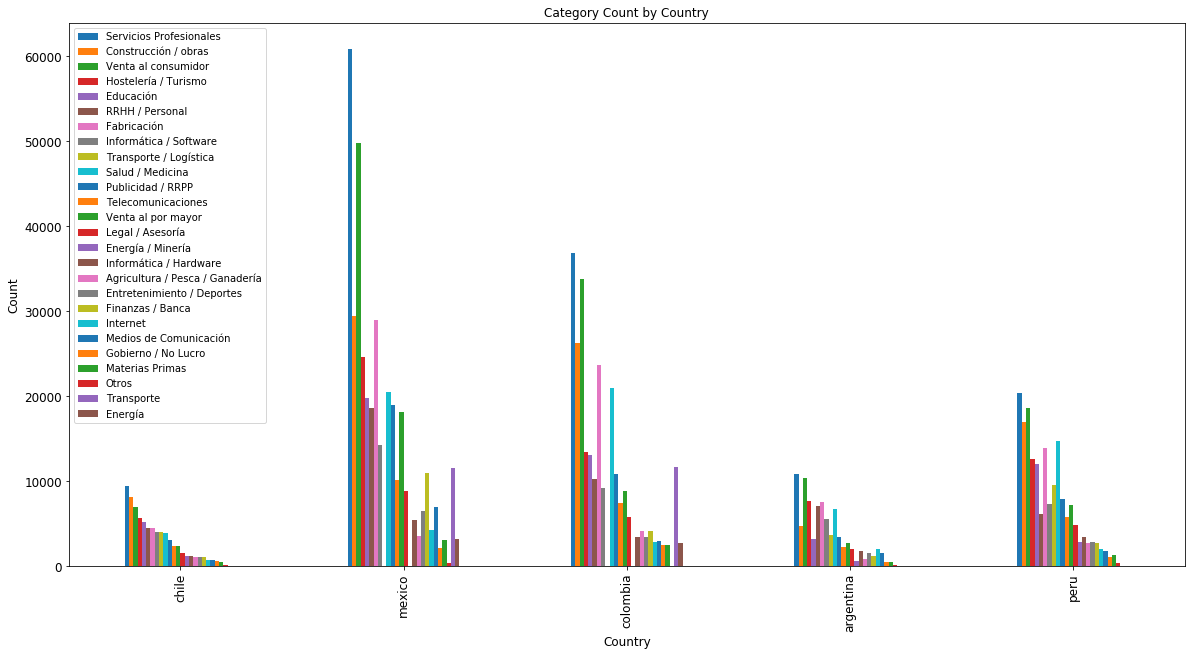

In [87]:
### plot the data
ax = df.plot( kind='bar', title ="Category Count by Country", figsize=(20,10), legend=True, fontsize=12 )

ax.set_xlabel( "Country", fontsize=12 )
ax.set_ylabel( "Count", fontsize=12 )